DISCLAIMER : There are lot of experiments done in between and hence the code will not run startight end to end

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.



In [ ]:
df = pd.read_csv('../input/clean-songs/song_data.csv')

In [ ]:
import seaborn as sns
train_corr = df.copy()
train_corr = train_corr.drop('log_youtube',axis=1)
train_corr = train_corr.drop('log_spotify',axis=1)
train_corr = train_corr.drop('TopSongsArtist',axis=1)
train_corr = train_corr.drop('TopSongsArtist10',axis=1)
train_corr = train_corr.drop('TopSongsArtist100',axis=1)
train_corr = train_corr.drop('time_signature',axis=1)
train_corr = train_corr.drop('mode',axis=1)
train_corr = train_corr.drop('key',axis=1)
train_corr = train_corr.drop('song decay rate',axis=1)
train_corr = train_corr.drop('current popularity',axis=1)
train_corr = train_corr.drop('diff_pop',axis=1)
train_corr = train_corr.drop('Artist_lifetime_grammy_achievement',axis=1)
train_corr = train_corr.drop('Artist_grammy_nominations',axis=1)
# train_corr = train_corr.drop('diff_pop',axis=1)

plt.figure(figsize=(25,25))
sns.heatmap(train_corr.corr(method="pearson"), annot=True, annot_kws={"size": 12},cmap="Blues")
# train_corr.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Accent'), axis=1)

In [ ]:
df = df[df['Youtube viewcount']>1]
df = df[df['Popularity']>0]
df['log_youtube'] = np.log(1+df['Youtube viewcount'])
df['log_spotify'] = np.log(1+df['Popularity'])
df['net_current_popularity'] = df['log_youtube']*df['log_spotify']
df['original_popularity'] = 136-df['Peak_Position']
df['current popularity']=0.0
df['song decay rate'] = 0.0

In [ ]:
df['diff_pop'] = df['net_current_popularity'] - df['original_popularity']

In [ ]:
df_base = df.copy()

In [ ]:
df_base['date'], df_base['month'],df_base['year'] = df_base['Entry_Date'].str.split('/').str
df_base['year'] = df_base['year'].apply(lambda x: ('19'+x) if int(x)>18 else ('20'+x))
df_base["year"] = pd.to_numeric(df_base["year"])
df_base['Artist_Name'] = df_base['Artist']
df_base.head()

In [ ]:
df_base = df_base.sort_values(by=['year'], ascending = True)
df_base.head()

In [59]:
df_peak1 = df_base[df_base['Peak_Position']==1]
df_peak2 = df_base[df_base['Peak_Position']==2]
df_peak25 = df_base[df_base['Peak_Position']==25]
df_peak50 = df_base[df_base['Peak_Position']==50]
df_peak75 = df_base[df_base['Peak_Position']==80]

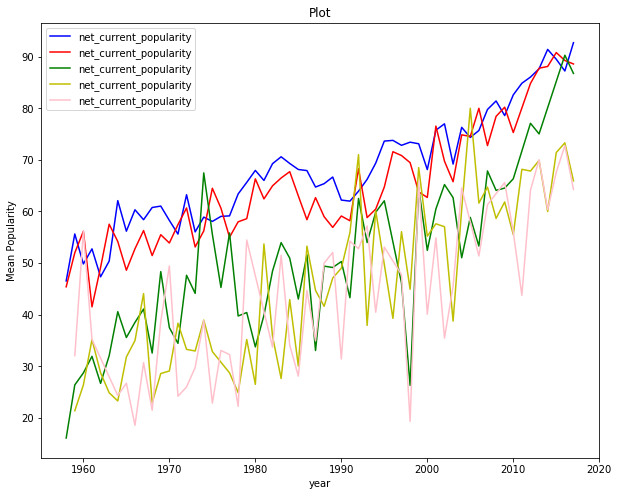

In [60]:
 import matplotlib.pyplot as plt
 plt.figure(figsize=(10,8))
 df_peak1.groupby('year')['net_current_popularity'].mean().sort_index().plot(color = 'b');
 df_peak2.groupby('year')['net_current_popularity'].mean().sort_index().plot(color = 'r');
 df_peak25.groupby('year')['net_current_popularity'].mean().sort_index().plot(color = 'g');
 df_peak50.groupby('year')['net_current_popularity'].mean().sort_index().plot(color = 'y');
 df_peak75.groupby('year')['net_current_popularity'].mean().sort_index().plot(color = 'pink');   
 plt.legend()
 plt.title('Plot');
 plt.ylabel('Mean Popularity')
 plt.xlabel('year')
 plt.show()

LGBM ML Model


In [ ]:
df_base.dtypes

In [ ]:
df_1970=df_base.copy()
df_1970x = df_base.copy()
df_1970=df_1970[df_1970['year']==1970]
df_1970=df_1970=df_1970.sort_values(by='net_current_popularity',ascending = False)
df_1970.head(20)

In [71]:
df_lgbm = df_base.copy()

In [72]:

df_lgbm = df_lgbm.drop('Title',axis=1)
df_lgbm = df_lgbm.drop('Popularity',axis=1)
df_lgbm = df_lgbm.drop('original_popularity',axis=1)
df_lgbm = df_lgbm.drop('log_youtube',axis=1)
df_lgbm = df_lgbm.drop('log_spotify',axis=1)
df_lgbm = df_lgbm.drop('Youtube viewcount',axis=1)
df_lgbm = df_lgbm.drop('Entry_Date',axis=1)
df_lgbm = df_lgbm.drop('Artist_Name',axis=1)
df_lgbm = df_lgbm.drop('date',axis=1)
df_lgbm = df_lgbm.drop('month',axis=1)
df_lgbm = df_lgbm.drop('diff_pop',axis=1)
df_lgbm = df_lgbm.drop('Oscars_won',axis=1)
df_lgbm = df_lgbm.drop('current popularity',axis=1)
df_lgbm = df_lgbm.drop('mode',axis=1)
df_lgbm = df_lgbm.drop('song decay rate',axis=1)
df_lgbm = df_lgbm.drop('duration_ms',axis=1)
df_lgbm = df_lgbm.drop('Artist',axis=1)
# df_lgbm = df_lgbm.drop('Artist_lifetime_grammy_achievement',axis=1)
df_lgbm = df_lgbm.drop('time_signature',axis=1)
# df_lgbm = df_lgbm.drop('Artist_grammy_nominations',axis=1)
# df_lgbm = df_lgbm.drop('mode',axis=1)
# df_lgbm = df_lgbm.drop('key',axis=1)







In [73]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_lgbm['Artist'] = le.fit_transform(df_lgbm.Artist.values)

AttributeError: 'DataFrame' object has no attribute 'Artist'

In [ ]:
### FOR 1970
from sklearn.model_selection import train_test_split
import lightgbm as lgb 
features = [c for c in df_lgbm.columns ]
features.remove("net_current_popularity")
features.remove("Artist_Name")
features.remove("Title")

train_x = df_lgbm[df_lgbm['year']!=1970]
train_y = train_x['net_current_popularity']
train_x = train_x[features]

valid_x = df_lgbm[df_lgbm['year']==1970]
valid_y = valid_x['net_current_popularity']
df_dummy1970 = valid_x.copy()
valid_x = valid_x[features]

# train_x, valid_x, train_y, valid_y = train_test_split(df_lgbm[features], df_lgbm["net_current_popularity"], test_size=0.2, random_state=20)
lgb_params = {"objective" : "regression", "metric" : "rmse",
              "num_leaves" : 100, "learning_rate" : 0.02, 
              "bagging_fraction" : 0.75, "feature_fraction" : 0.8, "bagging_frequency" : 9}
    
lgb_train = lgb.Dataset(train_x, label=train_y)
lgb_val = lgb.Dataset(valid_x, label=valid_y)
model = lgb.train(lgb_params, lgb_train, 500, valid_sets=[lgb_val], early_stopping_rounds=300, verbose_eval=100)

In [ ]:
df_dummy1970['net_current_popularity'] = model.predict(valid_x[features], num_iteration=model.best_iteration)

In [45]:
df_dummy1970=df_dummy1970.sort_values(by='net_current_popularity',ascending = False)
df_dummy1970.head(20)

,Title,Entry_Position,Peak_Position,Total_Weeks,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Movies_TV_feature_count,Artist_lifetime_grammy_achievement,Artist_grammy_wins,Artist_grammy_nominations,artist popularity,TopSongsArtist,TopSongsArtist10,TopSongsArtist100,net_current_popularity,year,Artist_Name
12620,Immigrant Song,83,16,13,0.564,0.932,11.0,-10.068,0.0554,0.013000,0.169000,0.3490,0.6190,112.937,3,1,1,3,83.000000,0,1,8,68.463477,1970,LED ZEPPELIN
2266,Paranoid,121,61,11,0.415,0.658,4.0,-12.051,0.0696,0.000045,0.000735,0.1760,0.4500,163.015,12,0,2,4,77.000000,0,0,2,67.619352,1970,BLACK SABBATH
17528,The Long And Winding Road,35,1,10,0.299,0.329,3.0,-10.096,0.0279,0.756000,0.010500,0.0559,0.3920,132.282,0,0,7,23,89.000000,11,6,9,64.141888,1970,BEATLES
9300,War,104,1,16,0.591,0.781,11.0,-9.680,0.1920,0.067700,0.000000,0.2940,0.7090,109.481,7,0,0,1,57.000000,1,1,8,63.772834,1970,EDWIN STARR
9323,Wigwam,112,41,8,0.407,0.470,0.0,-8.640,0.0370,0.755000,0.021600,0.0976,0.2270,138.471,3,1,0,6,79.000000,0,4,15,63.566915,1970,BOB DYLAN
12607,We've Only Just Begun,84,2,17,0.236,0.330,9.0,-11.635,0.0381,0.782000,0.000002,0.1110,0.3190,173.308,0,0,3,7,70.000000,0,3,5,63.527085,1970,CARPENTERS
8737,Make It With You,96,1,17,0.629,0.356,4.0,-11.135,0.0246,0.660000,0.000617,0.1730,0.4720,83.886,0,0,0,1,65.000000,1,4,5,62.857447,1970,BREAD
11100,Cracklin' Rosie,62,1,15,0.562,0.492,1.0,-14.669,0.0341,0.352000,0.000000,0.1640,0.8580,127.811,2,0,1,13,71.000000,2,8,28,62.598088,1970,NEIL DIAMOND
12601,I Think I Love You,114,1,21,0.432,0.471,3.0,-12.260,0.0473,0.422000,0.000000,0.1410,0.7830,203.270,1,0,0,0,46.000000,1,0,0,60.897225,1970,THE PARTRIDGE FAMILY starring SHIRLEY JONES fe...
1047,ABC,41,1,13,0.736,0.689,8.0,-11.781,0.0437,0.523000,0.000319,0.1230,0.9500,93.781,0,0,0,0,74.000000,2,2,1,60.614422,1970,JACKSON FIVE


In [46]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb 
features = [c for c in df_lgbm.columns ]
features.remove("net_current_popularity")
features.remove("Artist_Name")
features.remove("Title")


train_x, valid_x, train_y, valid_y = train_test_split(df_lgbm[features], df_lgbm["net_current_popularity"], test_size=0.2, random_state=20)


lgb_params = {"objective" : "regression", "metric" : "rmse",
              "num_leaves" : 100, "learning_rate" : 0.02, 
              "bagging_fraction" : 0.75, "feature_fraction" : 0.8, "bagging_frequency" : 9}
    
lgb_train = lgb.Dataset(train_x, label=train_y)
lgb_val = lgb.Dataset(valid_x, label=valid_y)
model = lgb.train(lgb_params, lgb_train, 500, valid_sets=[lgb_val], early_stopping_rounds=300, verbose_eval=100)

Training until validation scores don't improve for 300 rounds.
[100]	valid_0's rmse: 10.3042
[200]	valid_0's rmse: 9.69139
[300]	valid_0's rmse: 9.60022
[400]	valid_0's rmse: 9.57557
[500]	valid_0's rmse: 9.56715
Did not meet early stopping. Best iteration is:
[496]	valid_0's rmse: 9.56641


In [ ]:
from xgboost import XGBRegressor
from sklearn import metrics
train_x, valid_x, train_y, valid_y = train_test_split(df_lgbm[features], df_lgbm["net_current_popularity"], test_size=0.2, random_state=20)
my_model = XGBRegressor(n_estimators=5000, learning_rate=0.02)
my_model.fit(train_x, train_y, early_stopping_rounds=300, 
             eval_set=[(valid_x, valid_y)], verbose=False)
preds = my_model.predict(valid_x)
print('\nroot Mean Square error" ', np.sqrt(metrics.mean_squared_error(valid_y,preds)))

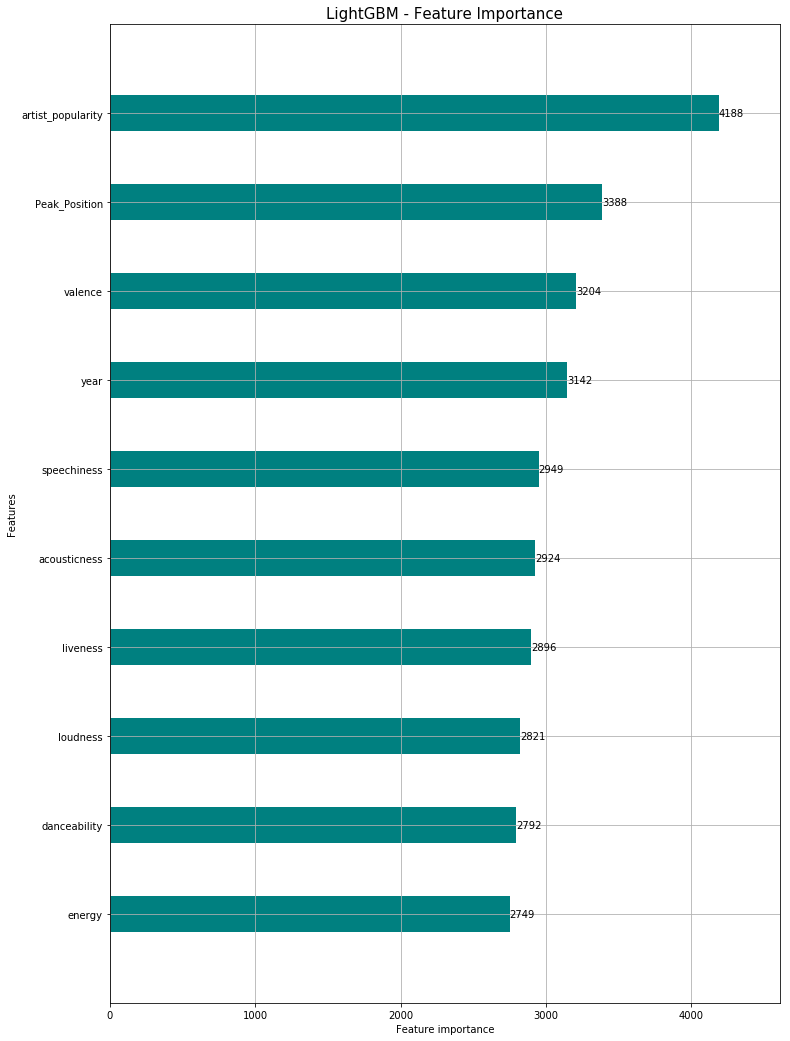

In [50]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=10, height=0.4, ax=ax,color='teal')
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
#plt.ylabel(fontsize=10)
plt.grid()
plt.show()

In [ ]:
import xgboost as xgb
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(my_model, max_num_features=10, height=0.4, ax=ax)
plt.show()

In [ ]:
df_lgbm.head()

In [78]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import lightgbm as lgb 
peak_list = df_lgbm['Peak_Position'].unique().tolist()
peak_list.sort()
features = [c for c in df_lgbm.columns ]
features.remove("net_current_popularity")
# print (range(len(year_list)))
# for i in range(0,100):
#      del peak_list[i]
rmse_list=[]
for y in peak_list:
    print (y)
    df_year_ts = df_lgbm[df_lgbm['Peak_Position']==y]
    df_year_tr = df_lgbm[df_lgbm['year']!=y]
#     train_x, valid_x, train_y, valid_y = train_test_split(df_year_tr[features],df_year_ts['net_current_popularity'], test_size=0.2, random_state=42)
    lgb_params = {"objective" : "regression", "metric" : "rmse",
                  "num_leaves" : 100, "learning_rate" : 0.02, 
                  "bagging_fraction" : 0.75, "feature_fraction" : 0.8, "bagging_frequency" : 9}
     
    lgb_train = lgb.Dataset(df_year_tr[features], label=df_year_tr['net_current_popularity'])
    lgb_val = lgb.Dataset(df_year_ts[features], label=df_year_ts['net_current_popularity'])
    model = lgb.train(lgb_params, lgb_train, 500, valid_sets=[lgb_val], early_stopping_rounds=200, verbose_eval=400)

    pred_test_y = model.predict(df_year_ts[features], num_iteration=model.best_iteration)
    lrmse = np.sqrt(metrics.mean_squared_error(pred_test_y, df_year_ts['net_current_popularity']))
    rmse_list.append(lrmse)
    
#     my_model = XGBRegressor(n_estimators=5000, learning_rate=0.02)
#     my_model.fit(df_year_tr[features], df_year_tr['net_current_popularity'], early_stopping_rounds=5, 
#              eval_set=[(df_year_ts[features], df_year_ts['net_current_popularity'])], verbose=False)
#     preds = my_model.predict(df_year_ts[features])
#     rmse_list.append(np.sqrt(metrics.mean_squared_error(df_year_ts['net_current_popularity'],pred_test_y)))
    


1
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 5.83105
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 5.50562
2
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 5.97805
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 5.68558
3
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 6.61735
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 6.28442
4
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 7.59035
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 7.1977
5
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 5.69217
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 5.38686
6
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 6.35446
Did not meet early stopping. Best iterati

[400]	valid_0's rmse: 7.53662
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 7.16431
49
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 7.4559
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 7.12543
50
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 7.6723
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 7.31476
51
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 6.62583
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 6.30659
52
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 7.35062
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 6.93309
53
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 6.47556
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 6.19758
54
Training until valida

Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 7.32083
96
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 7.96664
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 7.35629
97
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 7.86067
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 7.34149
98
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 7.29375
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 6.84708
99
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 7.48115
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 6.86571
100
Training until validation scores don't improve for 200 rounds.
[400]	valid_0's rmse: 7.11178
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 6.57551
101
Training until validation scores don't improve 

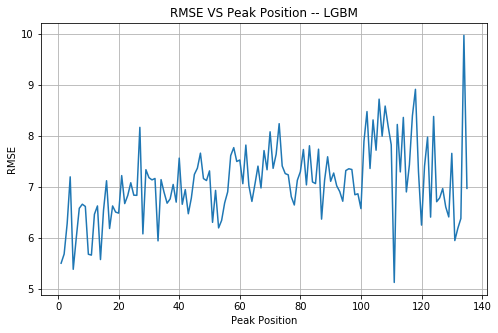

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.title("RMSE VS Peak Position -- LGBM")
plt.xlabel("Peak Position")
plt.ylabel("RMSE")
plt.grid()
plt.plot(peak_list,rmse_list)
plt.show()

In [64]:
df_peak1['year-bin'] = pd.cut(df_peak1['year'], bins = list(range(1950, 2020, 5))).astype(str)
df_peak1.loc[df_peak1['year-bin'] == 'nan', 'year-bin'] = '[2015+]'

df_peak2['year-bin'] = pd.cut(df_peak2['year'], bins = list(range(1950, 2020, 5))).astype(str)
df_peak2.loc[df_peak2['year-bin'] == 'nan', 'year-bin'] = '[2015+]'

df_peak25['year-bin'] = pd.cut(df_peak25['year'], bins = list(range(1950, 2020, 5))).astype(str)
df_peak25.loc[df_peak25['year-bin'] == 'nan', 'year-bin'] = '[2015+]'

df_peak50['year-bin'] = pd.cut(df_peak50['year'], bins = list(range(1950, 2020, 5))).astype(str)
df_peak50.loc[df_peak50['year-bin'] == 'nan', 'year-bin'] = '[2015+]'

df_peak75['year-bin'] = pd.cut(df_peak75['year'], bins = list(range(1950, 2020, 5))).astype(str)
df_peak75.loc[df_peak75['year-bin'] == 'nan', 'year-bin'] = '[2015+]'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

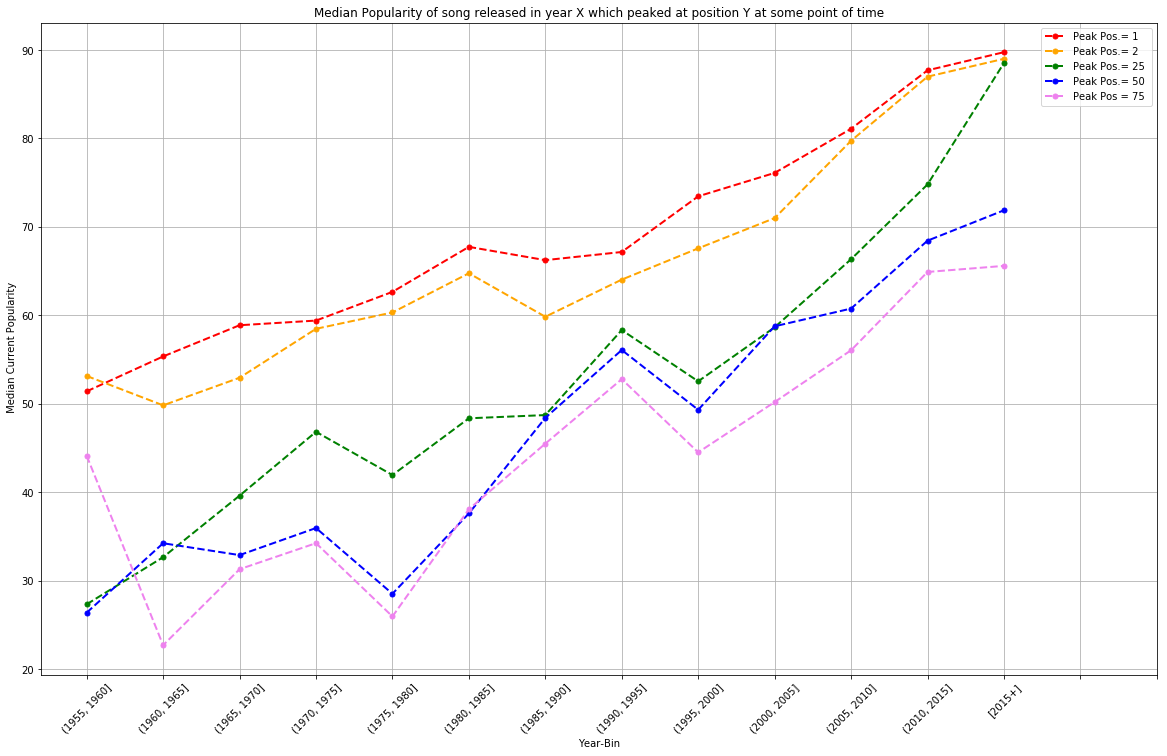

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
p1=df_peak1.groupby('year-bin')['net_current_popularity'].median().sort_index().plot(color = 'red',marker='o', linestyle='dashed', linewidth=2, markersize=5,label='Peak Pos.= 1');
p2=df_peak2.groupby('year-bin')['net_current_popularity'].median().sort_index().plot(color = 'orange',marker='o', linestyle='dashed', linewidth=2, markersize=5,label='Peak Pos.= 2');
p3=df_peak25.groupby('year-bin')['net_current_popularity'].median().sort_index().plot(color = 'green',marker='o', linestyle='dashed', linewidth=2, markersize=5,label='Peak Pos.= 25');
p4=df_peak50.groupby('year-bin')['net_current_popularity'].median().sort_index().plot(color = 'blue',marker='o', linestyle='dashed', linewidth=2, markersize=5,label='Peak Pos.= 50 ');
p5= df_peak75.groupby('year-bin')['net_current_popularity'].median().sort_index().plot(color = 'violet',marker='o', linestyle='dashed', linewidth=2, markersize=5,label='Peak Pos = 75');
# plt.legend((p1, p2, p3, p4),
#            ('Peak Po.= 1', 'Peak Po.= 2', 'Peak Po.= 25', 'Peak Po.= 50'),
#            fontsize=8)
plt.gca().legend()
plt.xlabel('Year-Bin')
plt.ylabel(' Median Current Popularity')

tick_labels = tuple(df_peak2['year-bin'].unique())
x_max = int(max(plt.xticks()[0]))
plt.xticks(range(0, x_max + 1), tick_labels, rotation=45)
plt.grid()
plt.title('Median Popularity of song released in year X which peaked at position Y at some point of time')
plt.show()

In [ ]:
# Top 5 overperforming songs in each period for songs that Peaked at 1 (super popular ones) : 
df_overper = df_peak1.copy()
df_overper = df_overper.sort_values(by = ['year-bin','net_current_popularity'], ascending = [True,False])
df_overper= df_overper.groupby('year-bin').head(5)
# df_overper = df_overper.sort_values(by = ['year-bin'], ascending = True)

In [ ]:
# Top 5 overperforming songs in each period: 

df_under = df_peak1.copy()
df_under = df_under.sort_values(by = ['year-bin','net_current_popularity'], ascending = [True,False])
df_under= df_under.groupby('year-bin').tail(5)

In [ ]:
df_median=df_peak1.groupby('year-bin').agg({'year-bin':'first','valence':'median','danceability':'median','speechiness':'median','loudness':'median','acousticness':'median','speechiness':'median','energy':'median'})
df_median.head(15)

In [ ]:
# 1. Plot of how valence has changed among songs which peaked at #1 at some point based on the year of release of that song
# 2. Plot of the overperforming and underperforming songs in each 5 year bin
from matplotlib.pyplot import plot
plt.figure(figsize=(10,6))

x = df_overper['year-bin'].unique()
y = df_overper.groupby('year-bin')['valence'].median()
plt.scatter(x,y,c='red',alpha = 0.5,label = 'median overperforming')

x = df_under['year-bin'].unique()
y = df_under.groupby('year-bin')['valence'].median()
plt.scatter(x,y,c='blue',alpha = 0.5,label = 'median underperforming')
# df_peak1.groupby('year-bin')['valence'].median().sort_index().plot(color = 'green');
plt.plot(df_median['year-bin'], df_median['valence'], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5,label='median valence of songs at Peak Pos = 1')
plt.title('Valence vs Year')

plt.gca().legend()
plt.xticks(rotation=45)
plt.ylabel('Median Valence')
plt.grid()
plt.show()

In [ ]:
# 1. Plot of how valence has changed among songs which peaked at #1 at some point based on the year of release of that song
# 2. Plot of the overperforming and underperforming songs in each 5 year bin
from matplotlib.pyplot import plot
plt.figure(figsize=(10,6))
y = df_overper.groupby('year-bin')['loudness'].median()
x = df_overper['year-bin'].unique()
plt.scatter(x,y,c='red',alpha = 0.5,label='median overperforming')

y = df_under.groupby('year-bin')['loudness'].median()
x = df_under['year-bin'].unique()
plt.scatter(x,y,c='blue',alpha = 0.5,label='median underperforming')

# df_peak1.groupby('year-bin')['valence'].median().sort_index().plot(color = 'green');
plot(df_median['year-bin'], df_median['loudness'], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5,label='median loudness of songs at peak pos = 1')
plt.title('Loudness vs Year')
plt.gca().legend()
plt.xticks(rotation=45)
plt.ylabel('Median Loudness')
plt.grid()

plt.show()

In [ ]:
from matplotlib.pyplot import plot
plt.figure(figsize=(10,6))
y = df_overper.groupby('year-bin')['danceability'].median()
x = df_overper['year-bin'].unique()
plt.scatter(x,y,c='red',alpha = 0.5,label='overperforming')

y = df_under.groupby('year-bin')['danceability'].median()
x = df_under['year-bin'].unique()
plt.scatter(x,y,c='blue',alpha = 0.5,label='underperforming')

# df_peak1.groupby('year-bin')['valence'].median().sort_index().plot(color = 'green');
plot(df_median['year-bin'], df_median['danceability'], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5,label='median danceability of songs at peak pos = 1')
plt.title('Danceability vs Year')
plt.gca().legend()
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('Median Danceability')
plt.show()

In [ ]:
from matplotlib.pyplot import plot
plt.figure(figsize=(10,6))
y = df_overper.groupby('year-bin')['acousticness'].median()
x = df_overper['year-bin'].unique()
plt.scatter(x,y,c='red',alpha = 0.5,label='overperforming')

y = df_under.groupby('year-bin')['acousticness'].median()
x = df_under['year-bin'].unique()
plt.scatter(x,y,c='violet',alpha = 0.5,label='underperforming')

# df_peak1.groupby('year-bin')['valence'].median().sort_index().plot(color = 'green');
plot(df_median['year-bin'], df_median['acousticness'], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5,label='median acousticness of songs at peak pos = 1')
plt.title('acousticness vs Year')
plt.ylabel('Median Acousticness')
plt.gca().legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
from matplotlib.pyplot import plot
plt.figure(figsize=(10,6))
y = df_overper.groupby('year-bin')['energy'].median()
x = df_overper['year-bin'].unique()
plt.scatter(x,y,c='red',alpha = 0.5,label='overperforming')

y = df_under.groupby('year-bin')['energy'].median()
x = df_under['year-bin'].unique()
plt.scatter(x,y,c='violet',alpha = 0.5,label='underperforming')

# df_peak1.groupby('year-bin')['valence'].median().sort_index().plot(color = 'green');
plot(df_median['year-bin'], df_median['energy'], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5,label='median energy of songs at peak pos = 1')
plt.title('energy vs Year')
plt.gca().legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
## 2nd Possible Approach
# Top 5 overperforming  --> top 10 songs which peaked at rank 100
# Top 5 underperforming --> bottom 10 songs which peaked at rank 1

In [ ]:
import matplotlib.pyplot  as plt

df_med_op=df_peak50.groupby('year-bin').agg({'year-bin':'first','valence':'median','danceability':'median','speechiness':'median','loudness':'median','acousticness':'median','speechiness':'median','energy':'median'})
df_med_ud=df_peak1.groupby('year-bin').agg({'year-bin':'first','valence':'median','danceability':'median','speechiness':'median','loudness':'median','acousticness':'median','speechiness':'median','energy':'median'})

# plt.subplot(2, 1, 1)
plt.figure(figsize=(10,6))
df_op = df_peak50.copy()
df_op = df_op.sort_values(by = ['year-bin','net_current_popularity'], ascending = [True,False])
df_op= df_op.groupby('year-bin').head(5)
plt.plot(df_med_op['year-bin'], df_med_op['danceability'], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5)
y = df_op.groupby('year-bin')['danceability'].median()
x = df_op['year-bin'].unique()
plt.scatter(x,y,c='red',alpha = 0.5)
plt.title('Danceability vs Year ')
# plt.show()

# plt.subplot(2, 1, 2)
# plt.figure(figsize=(18,5))
df_ud = df_peak1.copy()
df_ud = df_ud.sort_values(by = ['year-bin','net_current_popularity'], ascending = [True,False])
df_ud= df_ud.groupby('year-bin').tail(5)
plt.plot(df_med_ud['year-bin'], df_med_ud['danceability'], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5)
y = df_ud.groupby('year-bin')['danceability'].median()
x = df_ud['year-bin'].unique()
plt.scatter(x,y,c='violet',alpha = 0.5)
# plt.title('Danceability vs Year underperforming')
plt.gca().legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot  as plt

df_med_op=df_peak50.groupby('year-bin').agg({'year-bin':'first','valence':'median','danceability':'median','speechiness':'median','loudness':'median','acousticness':'median','speechiness':'median','energy':'median'})
df_med_ud=df_peak1.groupby('year-bin').agg({'year-bin':'first','valence':'median','danceability':'median','speechiness':'median','loudness':'median','acousticness':'median','speechiness':'median','energy':'median'})

# plt.subplot(2, 1, 1)
plt.figure(figsize=(18,5))
df_op = df_peak50.copy()
df_op = df_op.sort_values(by = ['year-bin','net_current_popularity'], ascending = [True,False])
df_op= df_op.groupby('year-bin').head(5)
# plt.plot(df_med_op['year-bin'], df_med_op['loudness'], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=3)
y = df_op.groupby('year-bin')['loudness'].median()
x = df_op['year-bin'].unique()
plt.scatter(x,y,c='red',alpha = 0.5)
# plt.title('Loudness vs Year overperforming')
# plt.show()

# plt.subplot(2, 1, 2)
# plt.figure(figsize=(18,5))
df_ud = df_peak1.copy()
df_ud = df_ud.sort_values(by = ['year-bin','net_current_popularity'], ascending = [True,False])
df_ud= df_ud.groupby('year-bin').tail(5)
plt.plot(df_med_ud['year-bin'], df_med_ud['loudness'], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=5)
y = df_ud.groupby('year-bin')['loudness'].median()
x = df_ud['year-bin'].unique()
plt.scatter(x,y,c='violet',alpha = 0.5)
plt.title('Loudness vs Year ')
plt.show()

In [ ]:
# Finding Artists With Song Popularity
# Artists -> The Beatles
df_artist = df_base.sort_values(by ='net_current_popularity', ascending = False)
df_artist = df_artist[df_artist['Artist_Name'].str.contains("SINATRA")]
df_artist = df_artist.sort_values(by ='year', ascending = False)
df_artist.head(100)

In [ ]:
# Frank Sinatra
import matplotlib.pyplot as plt
df_artist = df_base.sort_values(by ='net_current_popularity', ascending = False)
df_artist = df_artist[df_artist['Artist_Name'].str.contains("SINATRA")]
df_artist = df_artist.sort_values(by ='year', ascending = False)
df_artist = df_artist[df_artist['year']<1975]
df_artist.head(100)

plt.figure(figsize=(10,5))
x = df_artist['year']
y = df_artist['net_current_popularity']
plt.xlabel('Year')
plt.ylabel("Current Popularity")
plt.grid()
plt.scatter(x,y,color='red',alpha=0.5)

In [ ]:
# Frank Sinatra
df_artist = df_base.sort_values(by ='net_current_popularity', ascending = False)
df_artist = df_artist[df_artist['Artist_Name'].str.contains("BEATLES")]
df_artist = df_artist[df_artist['year']<1975]
df_artist = df_artist.sort_values(by ='year', ascending = False)
df_artist.head(100)

plt.figure(figsize=(10,8))
x = df_artist['year']
y = df_artist['net_current_popularity']
plt.xlabel('Year')
plt.ylabel("Current Popularity")
plt.grid()
plt.scatter(x,y,color='red',alpha=0.5)

In [ ]:
# Frank Sinatra
df_artist = df_base.sort_values(by ='net_current_popularity', ascending = False)
df_artist = df_artist[df_artist['Artist_Name'].str.contains("EAGLES")]
df_artist = df_artist.sort_values(by ='year', ascending = False)
df_artist.head(100)

plt.figure(figsize=(10,4))
x = df_artist['year']
y = df_artist['net_current_popularity']
plt.scatter(x,y)

In [ ]:
# Frank Sinatra
df_artist = df_base.sort_values(by ='net_current_popularity', ascending = False)
df_artist = df_artist[df_artist['Artist_Name'].str.contains("ROLLING STONES")]
df_artist = df_artist.sort_values(by ='year', ascending = False)
df_artist.head(100)

plt.figure(figsize=(10,6))
x = df_artist['year']
y = df_artist['net_current_popularity']
plt.grid()
plt.scatter(x,y,color='red',alpha=0.5)

In [ ]:
# Frank Sinatra
df_artist = df_base.sort_values(by ='net_current_popularity', ascending = False)
df_artist = df_artist[df_artist['Artist_Name'].str.contains("ELVIS PRESLEY")]
df_artist = df_artist.sort_values(by ='year', ascending = False)
df_artist = df_artist[df_artist['year']<2000]
df_artist.head(100)

plt.figure(figsize=(10,6))
x = df_artist['year']
plt.xlabel('Year')
plt.ylabel("Current Popularity")

y = df_artist['net_current_popularity']
plt.grid()
plt.scatter(x,y,color='red',alpha=0.5)

In [ ]:
# Eagles
df_artist = df_base.sort_values(by ='net_current_popularity', ascending = False)
df_artist = df_artist[df_artist['Artist_Name'].str.contains("ELTON JOHN")]
df_artist = df_artist.sort_values(by ='year', ascending = False)
df_artist.head(100)

plt.figure(figsize=(10,4))
x = df_artist['year']
y = df_artist['net_current_popularity']
plt.grid()
plt.ylabel('Current Popularity')
plt.xlabel('Year')
plt.scatter(x,y,c='red',alpha = 0.5)

In [ ]:
# Frank Sinatra
df_artist = df_base.sort_values(by ='net_current_popularity', ascending = False)
df_artist = df_artist[df_artist['Artist_Name'].str.contains("BOB DYLAN")]
df_artist = df_artist.sort_values(by ='year', ascending = False)
df_artist.head(100)

plt.figure(figsize=(1,4))
x = df_artist['year'].unique()
y = df_artist.groupby('year')['net_current_popularity'].median()
plt.bar(x,y)

In [ ]:
df_topmosthit.head(20)

In [ ]:
#One hit wonders

df_onehit = df_base.copy()
df_onehit['artist_count']=df_onehit.groupby('Artist')['Artist'].transform('count')

df_onehit=df_onehit.sort_values(by =['year','artist_count','net_current_popularity'], ascending= [True,True,False])
df_topmosthit = df_onehit.groupby('year').head(1)

In [ ]:
import seaborn as sns
ax = sns.barplot(x=df_topmosthit['year'], y="total_bill", hue="sex", data=tips)

In [ ]:
plt.figure(figsize=(15,8))

x = df_topmosthit['year']
y = df_topmosthit['net_current_popularity']
plt.scatter(x,y,c='red',alpha = 0.5,label='One Hit Wonder')

df_mostpop = df_base.copy()
df_mostpop['artist_count']=df_mostpop.groupby('Artist')['Artist'].transform('count')
df_mostpop = df_mostpop.sort_values(by =['year','net_current_popularity'], ascending= [True,False])
df_maxpop = df_mostpop.groupby('year').head(1)
x = df_maxpop['year']
y = df_maxpop['net_current_popularity']
plt.grid()
plt.ylabel('Current Popularity')
plt.scatter(x,y,c='blue',alpha = 0.5,label = 'Most Popular Song')
plt.gca().legend()
plt.show()



In [ ]:
df_topmosthit.head(20)

In [ ]:
df_mrg = pd.merge(df_topmosthit, df_maxpop, on="year")

df_mrg= df_mrg[df_mrg['net_current_popularity_y']-df_mrg['net_current_popularity_x'] < 10]
df_mrg
df_mrg.head(10)

1970 --> In the summertime
1994. --> Juicy
1995 --> Gangsta's Paradise

In [ ]:
df_topmosthit[df_topmosthit['year']==2000]

In [ ]:
df_maxpop[df_maxpop['year']==2000]

In [ ]:
import matplotlib.pyplot  as plt
plt.figure(figsize=(30,7))
df_artistpop = df_base.copy()
df_artistpop.sort_values(by='artist popularity',ascending=False)
x=df_artistpop['artist popularity'].unique()
y=df_artistpop.groupby('artist popularity')['net_current_popularity'].median()
plt.xlabel('Artist popularity')
plt.ylabel('Song popularity')
plt.title('Artist Popularity vs Current Song Popularity')
plt.bar(x,y)

In [ ]:
df_base.groupby('')

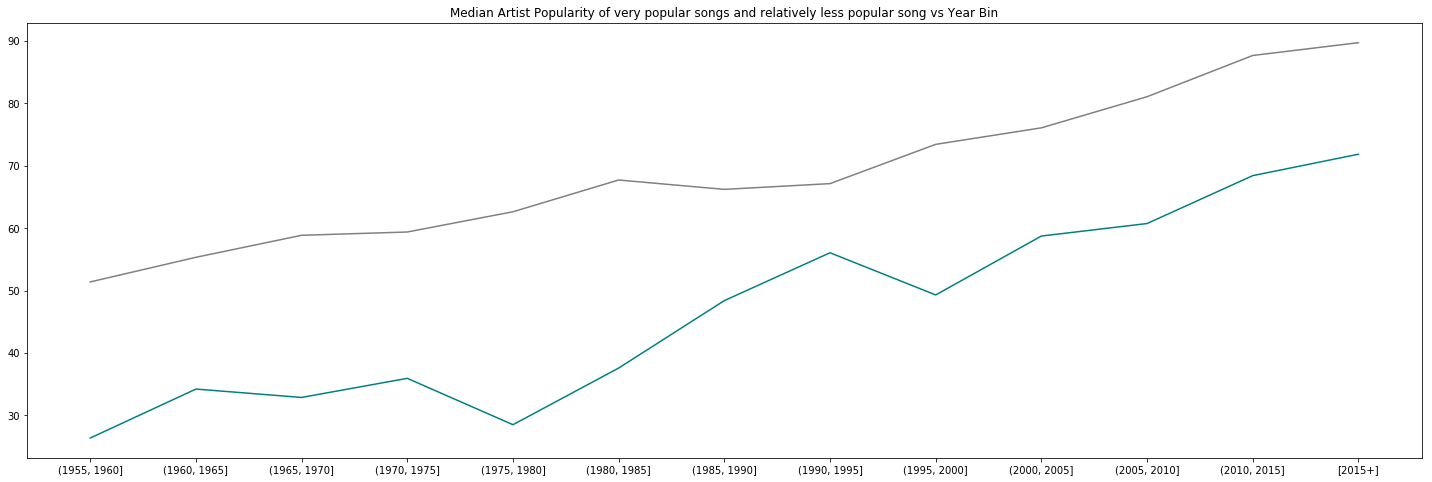

In [87]:
plt.figure(figsize=(25,8))
df_peak = df_peak1.sort_values(by = ['year-bin','net_current_popularity'], ascending = [True,False])
df_peak_median1 = df_peak.copy()
df_peak_median1['median_pop1'] = df_peak_median1.groupby('year-bin')['net_current_popularity'].transform('median')
# df_peak_median1[' median_pop1'] = df_peak_median1.groupby('year-bin').agg({'year-bin':'first','median_pop1':'first'})
plt.plot(df_peak_median1['year-bin'], df_peak_median1['median_pop1'], color='grey')

df_peak = df_peak50.sort_values(by = ['year-bin','net_current_popularity'], ascending = [True,False])
df_peak_median2 = df_peak.copy()
df_peak_median2['median_pop2'] = df_peak_median2.groupby('year-bin')['net_current_popularity'].transform('median')
# df_peak_median2['median_pop2'] = df_peak_median2.groupby('year-bin').agg({'year-bin':'first','median_pop2':'first'})
plt.plot(df_peak_median2['year-bin'], df_peak_median2['median_pop2'], color='teal')

# plt.bar(df_peak_median1['year-bin'], df_peak_median1['median_pop1'], align='center', alpha=0.2)
# plt.bar(df_peak_median2['year-bin'], df_peak_median2['median_pop2'], align='center', alpha=0.2)

# df_plot = df_peak_median1.copy()
# df_plot['median_pop2'] = df_peak_median2['median_pop2']
# df_plot.plot(x='year-bin',y=['median_pop1','median_pop2'],kind='bar',figsize=(30,40))
plt.title('Median Artist Popularity of very popular songs and relatively less popular song vs Year Bin')
#df_plot.plot(kind='bar',figsize=(20,10))
plt.show()

In [ ]:
df_sniff=df_base.head()
